In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

### Prepare random data 

##### 1. A synthetic datasets is being created  to act as an imput to the Autoencoder

##### 2. Plots random points in a 3D plane

In [2]:
def generate_data(m):
    angles = np.random.rand(m) * 3 * np.pi/(2-0.5)
    data = np.empty((m,3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    return data
    
        
    

In [3]:
# new generated data :

In [4]:
x_train = generate_data(100)

In [5]:
x_train = x_train - x_train.mean(axis=0, keepdims=0)

In [6]:
# Preview data in 3D :

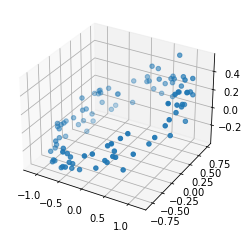

In [7]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[:,0],x_train[:,1],x_train[:,2],cmap='Reds')

### Build the model

In [8]:
encoder = keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])

In [9]:
decoder = keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])

In [10]:
autoencoder = keras.models.Sequential([encoder,decoder])

### Compile the Model :

In [11]:
autoencoder.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

### Train the model :

In [12]:
history = autoencoder.fit(x_train,x_train,epochs=200)

# encodes the data :
codings = encoder.predict(x_train)

Train on 100 samples
Epoch 1/200
100/100 [==============================] - 1s 5ms/sample - loss: 0.3729
Epoch 2/200
100/100 [==============================] - 0s 130us/sample - loss: 0.2803
Epoch 3/200
100/100 [==============================] - 0s 104us/sample - loss: 0.2334
Epoch 4/200
100/100 [==============================] - 0s 125us/sample - loss: 0.1993
Epoch 5/200
100/100 [==============================] - 0s 172us/sample - loss: 0.1760
Epoch 6/200
100/100 [==============================] - 0s 148us/sample - loss: 0.1550
Epoch 7/200
100/100 [==============================] - 0s 139us/sample - loss: 0.1359
Epoch 8/200
100/100 [==============================] - 0s 129us/sample - loss: 0.1181
Epoch 9/200
100/100 [==============================] - 0s 138us/sample - loss: 0.1032
Epoch 10/200
100/100 [==============================] - 0s 113us/sample - loss: 0.0853
Epoch 11/200
100/100 [==============================] - 0s 175us/sample - loss: 0.0689
Epoch 12/200
100/100 [===========

100/100 [==============================] - 0s 134us/sample - loss: 0.0049
Epoch 96/200
100/100 [==============================] - 0s 134us/sample - loss: 0.0049
Epoch 97/200
100/100 [==============================] - 0s 133us/sample - loss: 0.0049
Epoch 98/200
100/100 [==============================] - 0s 106us/sample - loss: 0.0049
Epoch 99/200
100/100 [==============================] - 0s 141us/sample - loss: 0.0048
Epoch 100/200
100/100 [==============================] - 0s 124us/sample - loss: 0.0048
Epoch 101/200
100/100 [==============================] - 0s 146us/sample - loss: 0.0048
Epoch 102/200
100/100 [==============================] - 0s 137us/sample - loss: 0.0048
Epoch 103/200
100/100 [==============================] - 0s 148us/sample - loss: 0.0048
Epoch 104/200
100/100 [==============================] - 0s 103us/sample - loss: 0.0048
Epoch 105/200
100/100 [==============================] - 0s 122us/sample - loss: 0.0048
Epoch 106/200
100/100 [===========================

100/100 [==============================] - 0s 117us/sample - loss: 0.0041
Epoch 189/200
100/100 [==============================] - 0s 142us/sample - loss: 0.0041
Epoch 190/200
100/100 [==============================] - 0s 140us/sample - loss: 0.0041
Epoch 191/200
100/100 [==============================] - 0s 30us/sample - loss: 0.0041
Epoch 192/200
100/100 [==============================] - 0s 225us/sample - loss: 0.0041
Epoch 193/200
100/100 [==============================] - 0s 103us/sample - loss: 0.0041
Epoch 194/200
100/100 [==============================] - 0s 173us/sample - loss: 0.0041
Epoch 195/200
100/100 [==============================] - 0s 85us/sample - loss: 0.0041
Epoch 196/200
100/100 [==============================] - 0s 125us/sample - loss: 0.0041
Epoch 197/200
100/100 [==============================] - 0s 143us/sample - loss: 0.0041
Epoch 198/200
100/100 [==============================] - 0s 144us/sample - loss: 0.0041
Epoch 199/200
100/100 [=========================

### Check input and Encoder output pairs

In [13]:
print(f"Input Point : {x_train[0]}\n")
print("Encoding point : ", codings[0])

Input Point : [1.12066949 0.18604514 0.37975883]

Encoding point :  [ 1.1129348  -0.18721452]


### Plot the encoder output :

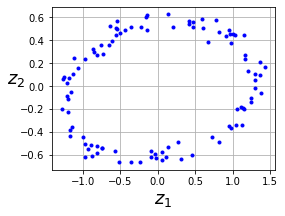

In [14]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

### Decoder output :

In [15]:
decodings = decoder.predict(codings)

In [16]:
print(f'input point: {x_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

input point: [1.12066949 0.18604514 0.37975883]
encoded point: [ 1.1129348  -0.18721452]
decoded point: [1.0634371  0.14197993 0.14451802]


### Plot the Decoder output :

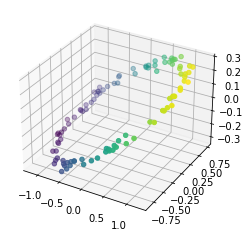

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:,0],decodings[:,1],decodings[:,2],c=decodings[:,0])